In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score

In [2]:
#Loading the data
print("Loading the data")
raisin_df = pd.read_excel('/Users/karan/Desktop/Karan/IITC/Academic/Spring 2022/Big Data/Project/BigDataProject/Raisin_Dataset/Raisin_Dataset.xlsx')

Loading the data


In [3]:
#Defining the dataframe Schema, data types
print("Defining the dataframe Schema,data types")
print(raisin_df.info())

Defining the dataframe Schema,data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB
None


In [4]:
#Shape of the dataframe
print("Dataframe shape: ", raisin_df.shape)

Dataframe shape:  (900, 8)


In [5]:
#Top 5 rows of the dataframe
print("Top 5 rows of Dataframe")
print(raisin_df.head())

Top 5 rows of Dataframe
    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  


In [6]:
#Summary statistics on every column
print("Summary Statistics on every column of dataframe:")
print(raisin_df.describe())

Summary Statistics on every column of dataframe:
                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872      0.348730   
25%     59348.000000       345.442898       219.111126      0.741766   
50%     78902.000000       407.803951       247.848409      0.798846   
75%    105028.250000       494.187014       279.888575      0.842571   
max    235047.000000       997.291941       492.275279      0.962124   

          ConvexArea      Extent    Perimeter  
count     900.000000  900.000000   900.000000  
mean    91186.090000    0.699508  1165.906636  
std     40769.290132    0.053468   273.764315  
min     26139.000000    0.379856   619.074000  
25%     61513.250000    0.670869   966.410750  
50%     81651.

In [7]:
#The number of null values present in each column
print("The number of null values present in each column:")
print(raisin_df.isnull().sum())

The number of null values present in each column:
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


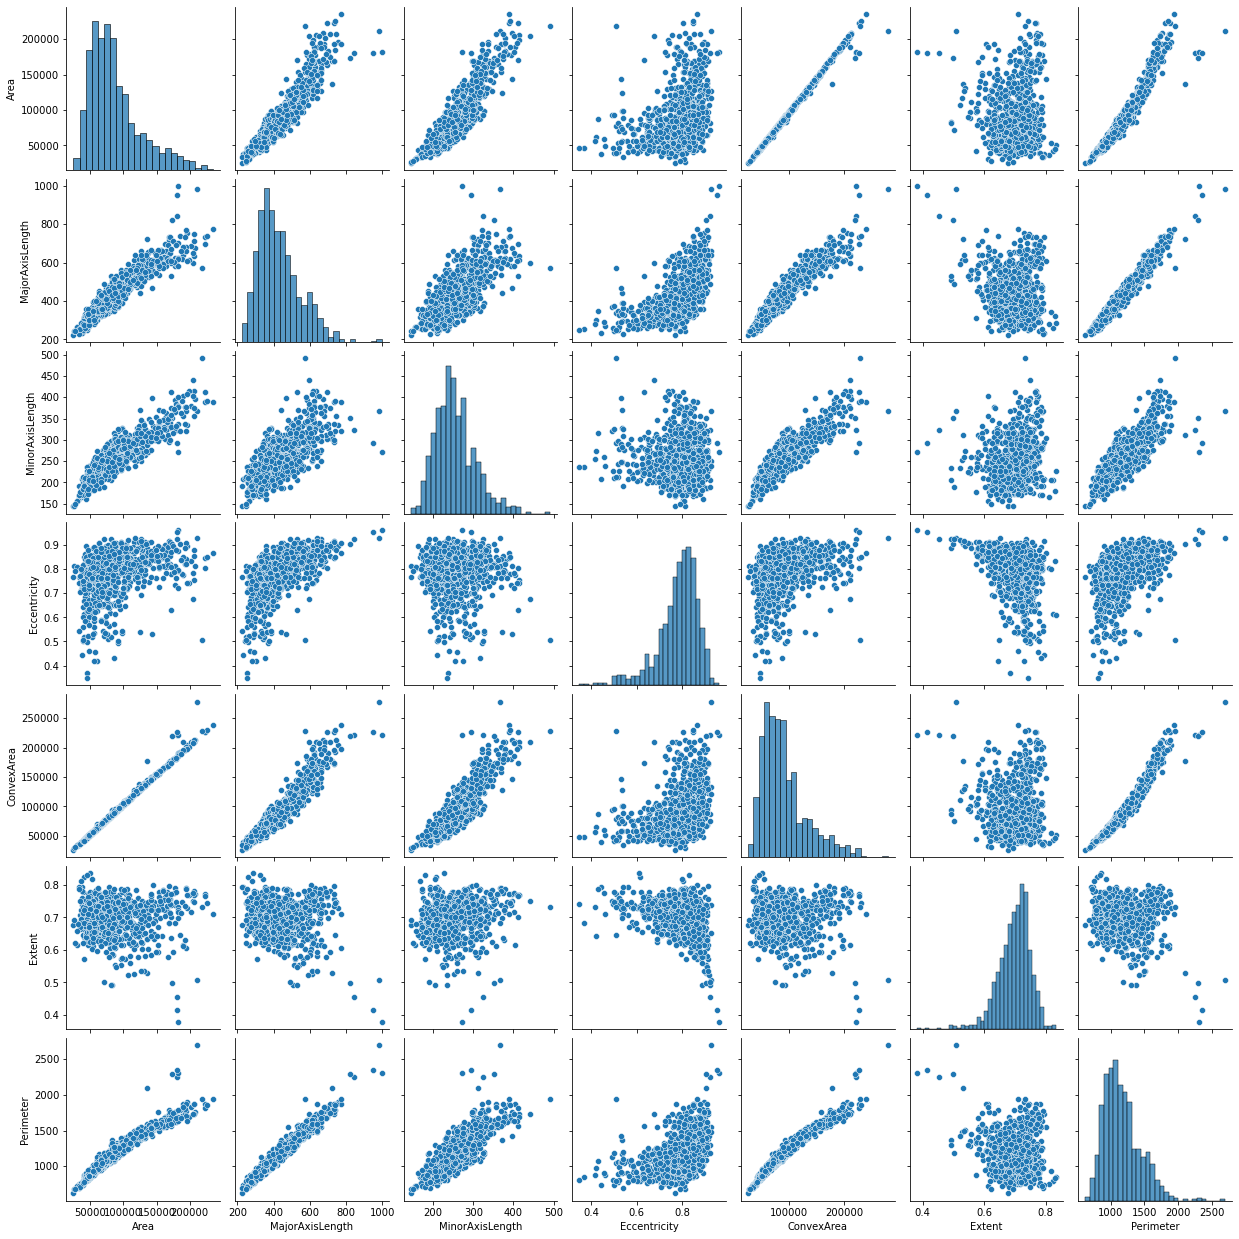

In [8]:
#The pairwise plot of each column
sns.pairplot(raisin_df)
plt.show()

In [9]:
print("The value counts of each target variable")
print(raisin_df['Class'].value_counts())

The value counts of each target variable
Besni      450
Kecimen    450
Name: Class, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


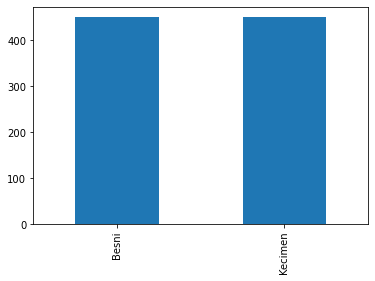

In [10]:
#creating the barplot target value counts of each category:
print(raisin_df['Class'].value_counts().plot(kind = 'bar'))

In [11]:
Y = raisin_df['Class']
X = raisin_df.drop('Class', axis = 1)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

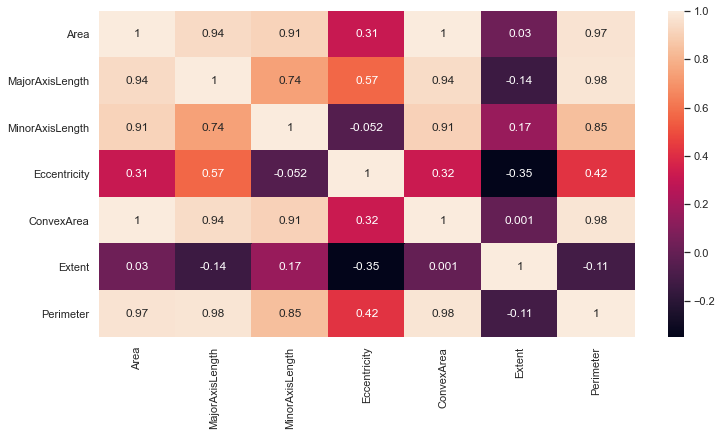

In [13]:
corrMatrix = X_train.corr()
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [14]:
#Custom function that returns the columns which have high correlation values
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = correlation(X_train, 0.85)
print("The below columns are dropped because they have a correlation value higher than the threshold of 0.85")
print(corr_features)

The below columns are dropped because they have a correlation value higher than the threshold of 0.85
{'MajorAxisLength', 'ConvexArea', 'MinorAxisLength', 'Perimeter'}


In [16]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [17]:
#Random Forest

In [18]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, Y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("Accuracy of the Random forest classifier model: ", metrics.accuracy_score(Y_test, y_pred))


Accuracy of the Random forest classifier model:  0.8417508417508418


In [19]:
#Classifying the target class into numberical values
raisin_df.loc[raisin_df["Class"] == "Kecimen", "Class"] = 1
raisin_df.loc[raisin_df["Class"] == "Besni", "Class"] = -1

In [20]:
Y = raisin_df['Class']
X = raisin_df.drop('Class', axis = 1)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [22]:
corr_features = correlation(X_train, 0.85)

In [23]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [24]:
regressor= LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [25]:
# Predicting y values 
y_pred = regressor.predict(X_test)

In [26]:
y_pred_new = np.where(y_pred >= 0, 1, -1)

In [27]:
errors = np.sum(y_pred_new != Y_test)

In [28]:
print("The total number of test data:", (len(Y_test)))

The total number of test data: 297


In [29]:
print("The number of wrongly classified values from test data:", errors)

The number of wrongly classified values from test data: 45


In [30]:
# Calculate and display accuracy
accuracy = 100 *((len(Y_test)-errors)/len(Y_test))
print('Accuracy of Linear Classifier Model:', round(accuracy, 2), '%.')

Accuracy of Linear Classifier Model: 84.85 %.
